In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter

In [22]:
import import_ipynb
#import p2_utils

In [23]:
from p2_utils import *

importing Jupyter notebook from p2_utils.ipynb


In [4]:
df_all = pd.read_csv("/Users/mikhail/Downloads/accidentes_2013.csv")

In [5]:
df_all.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14.0,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18.0,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
2,11,17.0,2,Tarragona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,SEÑAL DE STOP,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?
3,1,9.0,3,Lleida,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,PLENO DÍA,LLOVIZNANDO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,?,NINGUNA MEDIDA
4,11,22.0,7,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,NOCHE: ILUMINACIÓN SUFICIENTE,LLUVIA FUERTE,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?


## Case Study 1: Which clusters exist on highways on the weekends?

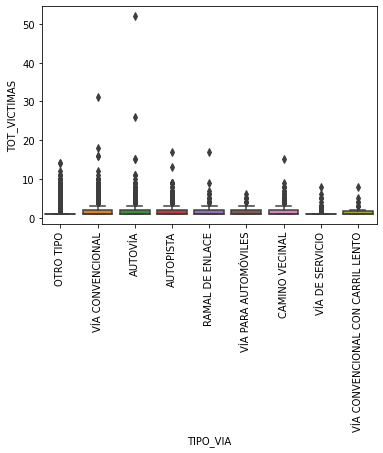

In [6]:
ax = sns.boxplot(data=df_all, y='TOT_VICTIMAS', x='TIPO_VIA')
plt.xticks(rotation=90)
plt.savefig("victims_vs_via.png",dpi=300, bbox_inches = "tight")

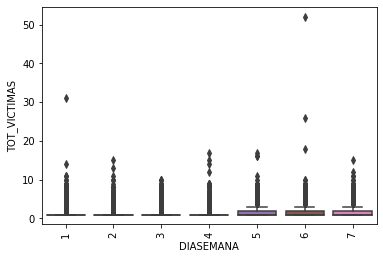

In [7]:
ax = sns.boxplot(data=df_all, y='TOT_VICTIMAS', x='DIASEMANA')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xticks(rotation=90)
plt.savefig("victims_vs_day.png",dpi=300, bbox_inches = "tight")

In [8]:
df = df_all[(df_all.TIPO_VIA.isin(['AUTOVÍA', 'AUTOPISTA']))] #only highways
df = df[df.DIASEMANA.isin([5,6,7])] #only weekned accidents

attributes= ["TOT_VICTIMAS", "TOT_MUERTOS", 
                                "TOT_HERIDOS_GRAVES", "TOT_HERIDOS_LEVES"] #variables of interest to cluster by

In [9]:
df_all.TIPO_VIA.unique()

array(['OTRO TIPO', 'VÍA CONVENCIONAL', 'AUTOVÍA', 'AUTOPISTA',
       'RAMAL DE ENLACE', 'VÍA PARA AUTOMÓVILES', 'CAMINO VECINAL',
       'VÍA DE SERVICIO', 'VÍA CONVENCIONAL CON CARRIL LENTO'],
      dtype=object)

In [10]:
df.DIASEMANA.unique()

array([6, 5, 7])

In [11]:
df.shape

(4981, 32)

## CASE STUDY 1.2 - compare highways to conventional roads

In [12]:
df3 = df_all[(df_all.TIPO_VIA.isin(['VÍA CONVENCIONAL', 'VÍA CONVENCIONAL CON CARRIL LENTO',
                                    'VÍA PARA AUTOMÓVILES', ]))] #only conventional car roads
df3 = df3[df3.DIASEMANA.isin([5,6,7])] #only weekned accidents

In [13]:
df3.shape

(12085, 32)

## Case Study 2: What clusters exist on bad weather days?

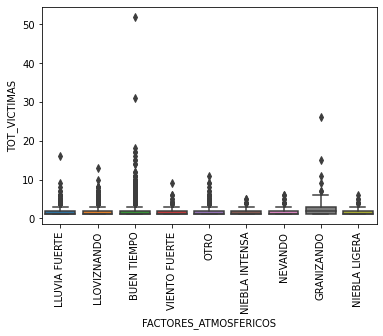

In [14]:
sns.boxplot(data=df_all, y='TOT_VICTIMAS', x='FACTORES_ATMOSFERICOS')
plt.xticks(rotation=90)
plt.savefig("victims_vs_weather.png",dpi=300,bbox_inches = "tight")

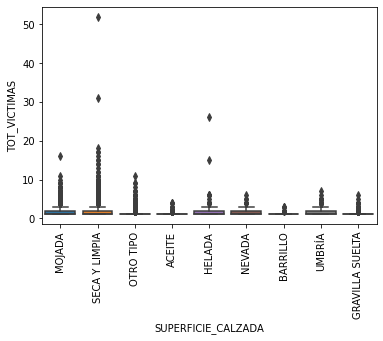

In [15]:
sns.boxplot(data=df_all, y='TOT_VICTIMAS', x='SUPERFICIE_CALZADA')
plt.xticks(rotation=90)
plt.savefig("victims_vs_surface.png",dpi=300,bbox_inches = "tight")

In [16]:
df_all.LUMINOSIDAD.unique()

array(['PLENO DÍA', 'NOCHE: ILUMINACIÓN SUFICIENTE', 'CREPÚSCULO',
       'NOCHE: SIN ILUMINACIÓN', 'NOCHE: ILUMINACIÓN INSUFICIENTE'],
      dtype=object)

In [17]:
df_all.FACTORES_ATMOSFERICOS.unique()

array(['LLUVIA FUERTE', 'LLOVIZNANDO', 'BUEN TIEMPO', 'VIENTO FUERTE',
       'OTRO', 'NIEBLA INTENSA', 'NEVANDO', 'GRANIZANDO', 'NIEBLA LIGERA'],
      dtype=object)

In [18]:
df_all.VISIBILIDAD_RESTRINGIDA.unique()

array(['FACTORES ATMOSFÉRICOS', 'OTRA_CAUSA', '?', 'SIN RESTRICCIÓN',
       'CONFIGURACIÓN DEL TERRENO', 'VEGETACIÓN', 'DESLUMBRAMIENTO',
       'EDIFICIOS', 'POLVO O HUMO'], dtype=object)

In [19]:
df_all.SUPERFICIE_CALZADA.unique()

array(['MOJADA', 'SECA Y LIMPIA', 'OTRO TIPO', 'ACEITE', 'HELADA',
       'NEVADA', 'BARRILLO', 'UMBRÍA', 'GRAVILLA SUELTA'], dtype=object)

In [20]:
df2 = df_all[(df_all.FACTORES_ATMOSFERICOS.isin([ 'LLUVIA FUERTE', 'LLOVIZNANDO']))] #only bad weather
df2 = df2[df2.SUPERFICIE_CALZADA.isin(['MOJADA'])] #only weekned accidents

In [21]:
df2.shape

(9325, 32)

In [24]:
data = to_matrix(df3, attributes)

In [25]:
data[:5]

array([[2, 0, 0, 2],
       [1, 0, 0, 1],
       [4, 0, 2, 2],
       [2, 0, 0, 2],
       [3, 0, 0, 3]])

In [26]:
data_norm = norm(data)

In [27]:
data_norm[:5]

array([[0.05882353, 0.        , 0.        , 0.11764706],
       [0.        , 0.        , 0.        , 0.05882353],
       [0.17647059, 0.        , 0.33333333, 0.11764706],
       [0.05882353, 0.        , 0.        , 0.11764706],
       [0.11764706, 0.        , 0.        , 0.17647059]])

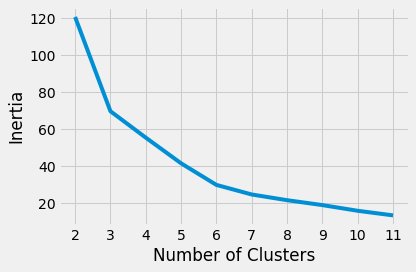

5

In [28]:
find_k_ellbow(data_norm, "Case1.2_KMeans_find_k_sse.png")

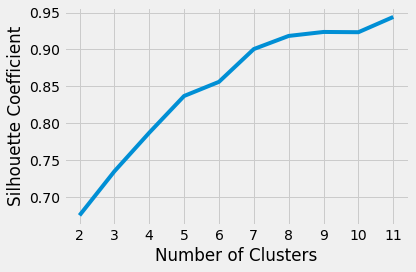

In [29]:
find_k_silhoutte(data_norm, "Case1.2_KMeans_find_k_silh.png")

In [30]:
import time
start_time = time.time()
results = KMeans(n_clusters=5, random_state=42).fit(data_norm)
end_time = time.time()
print("Execution Time KMeans: ", (end_time - start_time))

Execution Time KMeans:  0.2393498420715332


In [31]:
labels = results.labels_
centroids = results.cluster_centers_

## EVALUATION

In [32]:

silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))


silhouette: 0.837626
calinsky: 10369.967861


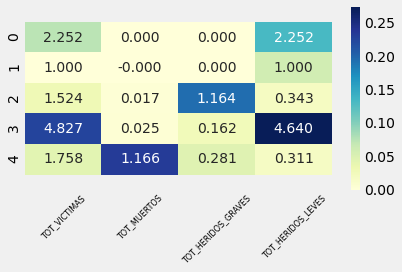

In [33]:
visualize_centroids(centroids, data, attributes)
plt.savefig("Case1.2KMeans5_Centers.png",dpi=300)

In [34]:
Counter(labels)

Counter({0: 2638, 1: 6878, 2: 1673, 4: 302, 3: 594})

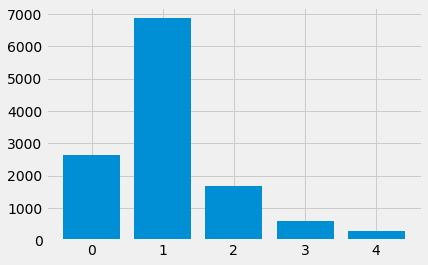

In [35]:
w = Counter(labels)
plt.bar(w.keys(), w.values())
plt.savefig("Case1.2CountClusterKMeans.png",dpi=300)

## PLOT CLUSTERS

In [36]:


df_data = pd.DataFrame(data)
df_data.columns = attributes
df_data['cluster'] = labels
df_data.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,cluster
0,2,0,0,2,0
1,1,0,0,1,1
2,4,0,2,2,2
3,2,0,0,2,0
4,3,0,0,3,0


In [37]:
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Datas

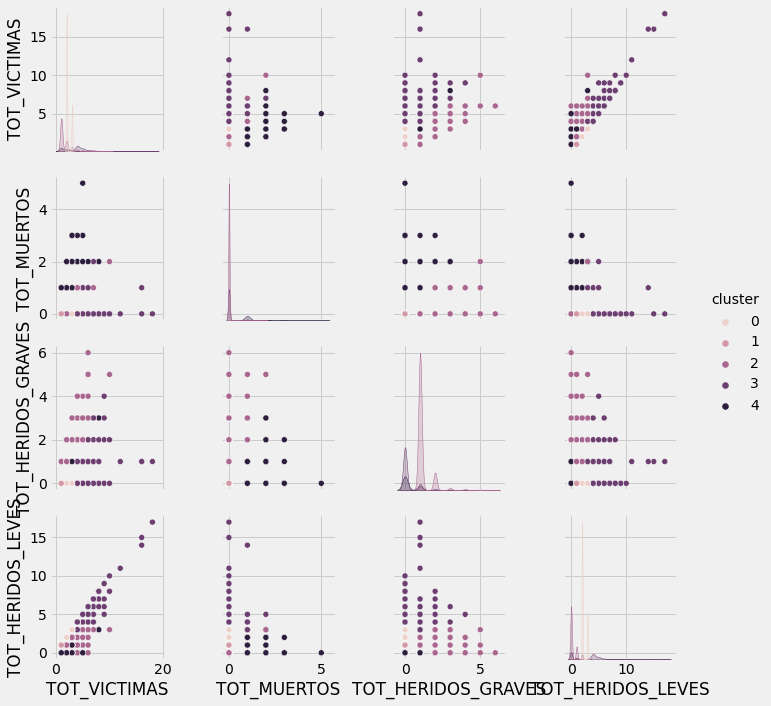

In [38]:
sns.pairplot(df_data, hue="cluster")
plt.savefig("case1.2_dbscan_Pairplot.png",dpi=300)

## Density Clustering with DBSCAN

In [39]:

import time
start_time = time.time()
#played around with eps 0.1-1, min_samples 5 - 50, p 0 -20
#with default setting just one cluster
# eps .1-.5 for more clusters
results = DBSCAN(eps=.1,min_samples=80, n_jobs=-1).fit(data_norm)
#results = DBSCAN(eps=.2,min_samples=20, n_jobs=-1).fit(data_norm)
end_time = time.time()
print("Execution Time DBSCAN: ", (end_time - start_time))

Execution Time DBSCAN:  2.1202192306518555


In [40]:
data_norm[:5]

array([[0.05882353, 0.        , 0.        , 0.11764706],
       [0.        , 0.        , 0.        , 0.05882353],
       [0.17647059, 0.        , 0.33333333, 0.11764706],
       [0.05882353, 0.        , 0.        , 0.11764706],
       [0.11764706, 0.        , 0.        , 0.17647059]])

In [41]:
labels = results.labels_
#EVALUATION
silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.698909
calinsky: 2922.927527


In [42]:
Counter(labels)

Counter({0: 10008, 2: 157, 1: 1508, 3: 208, -1: 204})

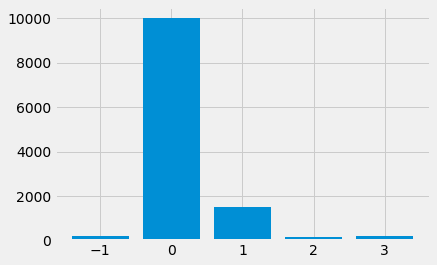

In [43]:
w = Counter(labels)
plt.bar(w.keys(), w.values())
plt.savefig("Case1.2CountClusterDBSCAN.png",dpi=300)

In [44]:
df_data = pd.DataFrame(data)
df_data.columns = attributes
df_data['cluster'] = labels
df_data.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,cluster
0,2,0,0,2,0
1,1,0,0,1,0
2,4,0,2,2,2
3,2,0,0,2,0
4,3,0,0,3,0


In [45]:
df_centroides = df_data.groupby('cluster').mean()

In [46]:
df_centroides

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES
cluster,,,,
-1,4.549020,0.916667,1.504902,2.127451
0,1.507094,0.000000,0.000000,1.507094
1,1.396552,0.000000,1.000000,0.396552
2,2.515924,0.000000,2.000000,0.515924
3,1.230769,1.000000,0.000000,0.230769
